<a href="https://colab.research.google.com/github/FelipeOcampo03/FeaturesImportanceInasist/blob/main/Features_Importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Inasistencia/BDG_0.xlsx')
data

,Tipo de cita,edad,sexo,tiempo (m),distancia (km),aseguradora tipo,Numero DX,Hosp. Reciente,Numero de MX,hora,día cita,mes cita,intervalo creación - asignación,Asistencias previas,Inasistencias previas,Cali
0,0,90,1,19.0,7.0,3,4,0,6,9,1,8,58,7,1,1
1,0,92,1,11.0,4.0,4,1,0,0,13,2,5,61,3,0,1
2,0,92,1,36.0,17.0,4,2,0,0,13,4,7,33,2,0,1
3,0,81,0,36.0,13.0,3,4,0,0,16,0,6,1,4,1,1
4,0,84,1,9.0,3.0,3,1,0,0,10,3,1,19,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13889,0,17,0,28.0,9.0,5,1,0,0,16,1,3,1,3,0,1
13890,0,81,1,31.0,10.0,5,1,0,0,16,3,4,4,1,0,1
13891,0,57,0,31.0,10.0,5,4,0,0,17,3,4,4,1,0,1
13892,0,30,0,10.0,2.0,7,5,1,0,14,1,2,1,1,2,1


In [ ]:
data['Tipo de cita'].value_counts()

0    12153
1     1741
Name: Tipo de cita, dtype: int64

In [ ]:
data = data.dropna(axis=0) #Eliminar valores NaN

In [ ]:
from sklearn.preprocessing import StandardScaler
x = data.drop('Tipo de cita', axis=1)  # Ajusta 'etiqueta' al nombre de la columna de etiquetas
y = data['Tipo de cita']
X_train_resampled, X_test, y_train_resampled, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train_resampled= sc.fit_transform(X_train_resampled)
X_test = sc.transform(X_test)

#Adaboost DecisionTree

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
base_classifier = DecisionTreeClassifier(max_depth=1)

In [ ]:
adaboost_classifier_dt = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)
adaboost_classifier_dt.fit(X_train_resampled, y_train_resampled)
y_pred = adaboost_classifier_dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del clasificador AdaBoost:", accuracy)

Precisión del clasificador AdaBoost: 0.9211379186172128


In [ ]:
rf_importances = adaboost_classifier_dt.feature_importances_

In [ ]:
feature_names = x.columns

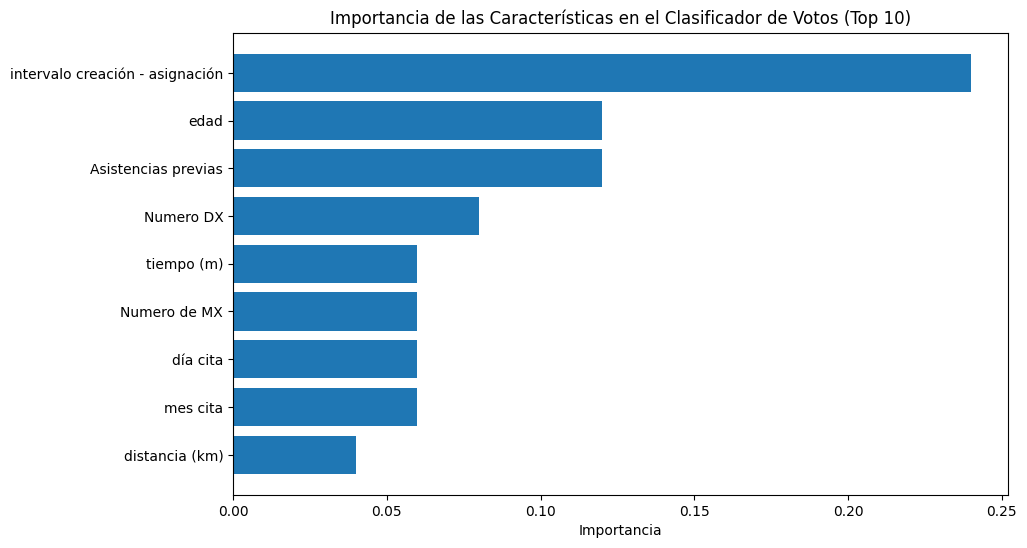

In [ ]:
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_importances})

# Ordena el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Grafica las "features importance"
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:9], feature_importance_df['Importance'][:9])
plt.xlabel('Importancia')
plt.title('Importancia de las Características en el Clasificador de Votos (Top 10)')
plt.gca().invert_yaxis()  # Invierte el eje y para que las características más importantes estén arriba
plt.show()

In [ ]:
importance_df= pd.DataFrame({'Feature':feature_names, 'Importance':rf_importances})


In [ ]:
print(importance_df)

                            Feature  Importance
0                              edad        0.12
1                              sexo        0.02
2                        tiempo (m)        0.06
3                    distancia (km)        0.04
4                  aseguradora tipo        0.04
5                         Numero DX        0.08
6                    Hosp. Reciente        0.00
7                      Numero de MX        0.06
8                              hora        0.04
9                          día cita        0.06
10                         mes cita        0.06
11  intervalo creación - asignación        0.24
12              Asistencias previas        0.12
13            Inasistencias previas        0.04
14                             Cali        0.02


In [ ]:
print(importance_df)

                            Feature  Importance
0                              edad        0.12
1                              sexo        0.02
2                        tiempo (m)        0.06
3                    distancia (km)        0.04
4                  aseguradora tipo        0.04
5                         Numero DX        0.08
6                    Hosp. Reciente        0.00
7                      Numero de MX        0.06
8                              hora        0.04
9                          día cita        0.06
10                         mes cita        0.06
11  intervalo creación - asignación        0.24
12              Asistencias previas        0.12
13            Inasistencias previas        0.04
14                             Cali        0.02


##ExtraTrees

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

# Crear un clasificador Extra Trees
# n_estimators es el número de árboles en el ensamblaje
# max_features es el número de características a considerar en cada división
extra_trees = ExtraTreesClassifier(n_estimators=100, max_features="auto", random_state=42)

# Entrenar el clasificador en los datos de entrenamiento
extra_trees.fit(X_train_resampled, y_train_resampled)

# Realizar predicciones en los datos de prueba
y_pred = extra_trees.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
rf_importances = extra_trees.feature_importances_

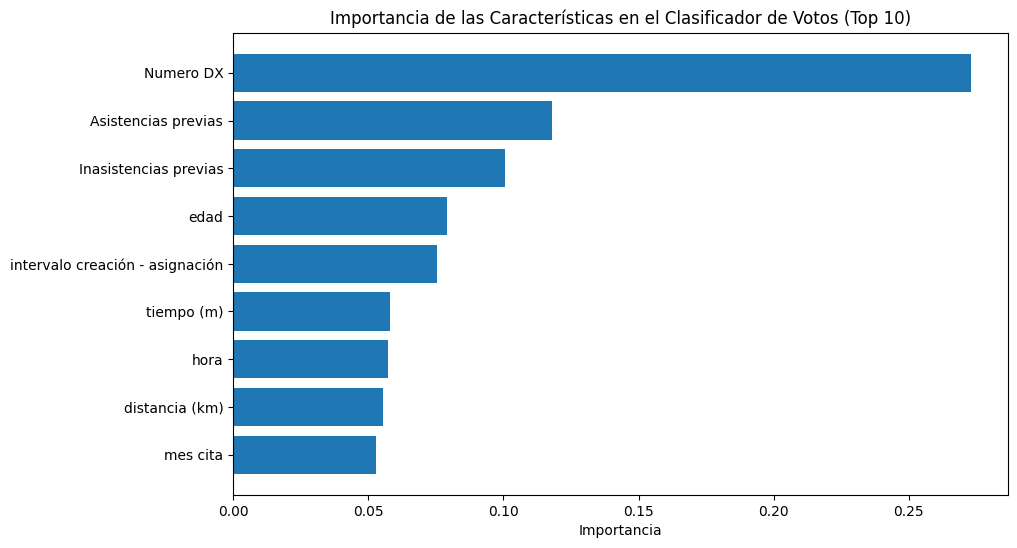

In [ ]:
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_importances})

# Ordena el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Grafica las "features importance"
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:9], feature_importance_df['Importance'][:9])
plt.xlabel('Importancia')
plt.title('Importancia de las Características en el Clasificador de Votos (Top 10)')
plt.gca().invert_yaxis()  # Invierte el eje y para que las características más importantes estén arriba
plt.show()

In [ ]:
importance_df= pd.DataFrame({'Feature':feature_names, 'Importance':rf_importances})

In [ ]:
print(importance_df)

                            Feature  Importance
0                              edad    0.079298
1                              sexo    0.018530
2                        tiempo (m)    0.057988
3                    distancia (km)    0.055608
4                  aseguradora tipo    0.023535
5                         Numero DX    0.273012
6                    Hosp. Reciente    0.005770
7                      Numero de MX    0.025316
8                              hora    0.057504
9                          día cita    0.049641
10                         mes cita    0.052872
11  intervalo creación - asignación    0.075438
12              Asistencias previas    0.117946
13            Inasistencias previas    0.100534
14                             Cali    0.007009


##Baggin RF

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score

# Crear un clasificador Random Forest como modelo base
base_classifierRF = RandomForestClassifier(random_state=42)

# Crear el clasificador Bagging con 10 estimadores y el modelo base Random Forest
bagging_classifierRF = BaggingClassifier(base_classifierRF, n_estimators=10, random_state=42)

# Entrenar el clasificador Bagging en los datos de entrenamiento
bagging_classifierRF.fit(X_train_resampled, y_train_resampled)

# Realizar predicciones en el conjunto de prueba
predictions = bagging_classifierRF.predict(X_test)

In [ ]:
feature_importance= np.mean([tree.feature_importances_ for tree in bagging_classifierRF.estimators_], axis=0)

In [ ]:
features_names= x.columns

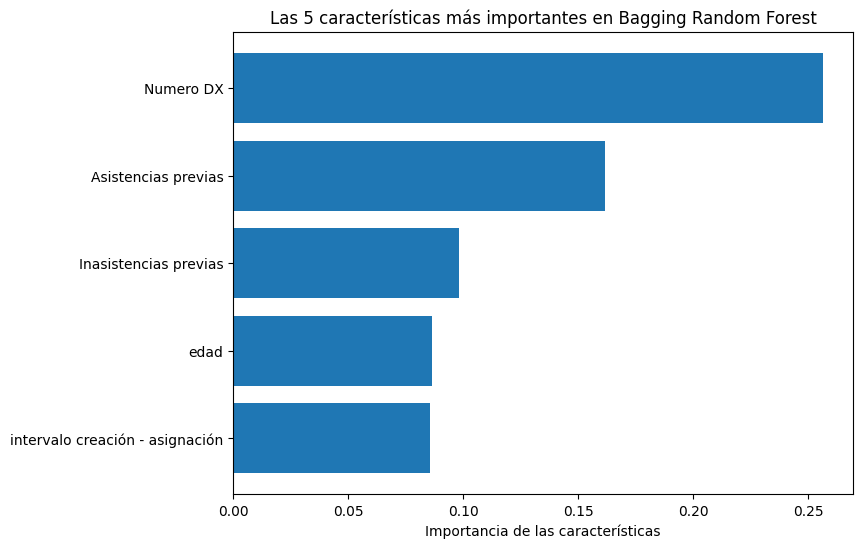

In [ ]:
top_5_indices = np.argsort(feature_importance)[::-1][:5]

top_5_features = [feature_names[i] for i in top_5_indices]

top_5_importance = [feature_importance[i] for i in top_5_indices]



# Visualizar las 5 características más importantes

plt.figure(figsize=(8, 6))

plt.barh(range(len(top_5_importance)), top_5_importance, align='center')

plt.yticks(np.arange(len(top_5_features)), top_5_features)

plt.xlabel('Importancia de las características')

plt.title('Las 5 características más importantes en Bagging Random Forest')

plt.gca().invert_yaxis()  # Invertir el eje y para que la característica más importante esté en la parte superior

plt.show()

##Adaboost RF

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generar un conjunto de datos de ejemplo
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Crear un Random Forest como clasificador base
base_classifier = RandomForestClassifier(  n_estimators=5,
    max_depth=5,               # Ajusta la profundidad máxima
    min_samples_split=5,       # Ajusta el número mínimo de muestras para dividir
    min_samples_leaf=2,        # Ajusta el número mínimo de muestras en nodos hoja
    random_state=42)

# Crear el clasificador AdaBoost utilizando el Random Forest como clasificador base
adaboost_classifierRF = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

# Entrenar el clasificador AdaBoost
adaboost_classifierRF.fit(X_train_resampled, y_train_resampled)

# Realizar predicciones en el conjunto de prueba
y_pred = adaboost_classifierRF.predict(X_test)

In [ ]:
rf_importances = adaboost_classifierRF.feature_importances_

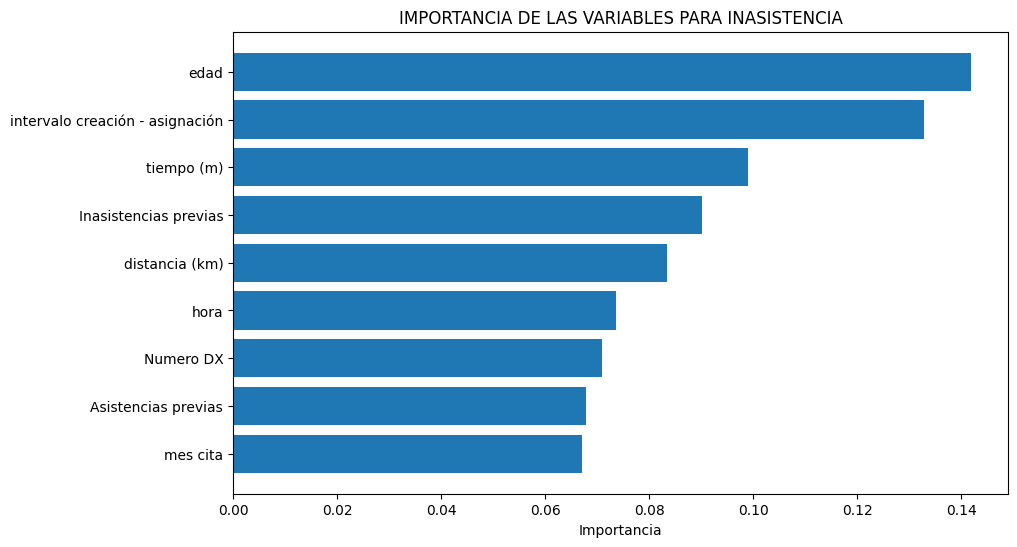

In [ ]:
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_importances})

# Ordena el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Grafica las "features importance"
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:9], feature_importance_df['Importance'][:9])
plt.xlabel('Importancia')
plt.title('IMPORTANCIA DE LAS VARIABLES PARA INASISTENCIA')
plt.gca().invert_yaxis()  # Invierte el eje y para que las características más importantes estén arriba
plt.show()

In [ ]:
importance_df= pd.DataFrame({'Feature':feature_names, 'Importance':rf_importances})

In [ ]:
print(importance_df)

                            Feature  Importance
0                              edad    0.141839
1                              sexo    0.018620
2                        tiempo (m)    0.098945
3                    distancia (km)    0.083333
4                  aseguradora tipo    0.031854
5                         Numero DX    0.070940
6                    Hosp. Reciente    0.007769
7                      Numero de MX    0.038232
8                              hora    0.073632
9                          día cita    0.063923
10                         mes cita    0.067051
11  intervalo creación - asignación    0.132798
12              Asistencias previas    0.067876
13            Inasistencias previas    0.090225
14                             Cali    0.012963


In [ ]:
feature_importance_df.to_excel('caracteristicas_importancia.xlsx', index=False)